# Preprocessing

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [402]:
df=pd.read_csv('fifa_18_sample_data.csv')

In [403]:
df.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [404]:
df.shape

(1000, 185)

In [405]:
dropcolumns=['ID','name','full_name','club_logo','birth_date','real_face','flag','photo','eur_release_clause','eur_wage']
#we additionally removed eur_realease_clause, and eur_wage, because it may not be that big factor
#we didn't remove the player price, because it's a big factor related to player performance
for col in dropcolumns:
  df.drop(col, axis=1,inplace=True)



In [406]:
df.shape

(1000, 175)

In [407]:
df['body_type'].unique()

array(['C. Ronaldo', 'Messi', 'Neymar', 'Normal', 'Lean', 'Courtois',
       'Stocky', 'Shaqiri'], dtype=object)

In [408]:
df['body_type']=df['body_type'].replace({'C. Ronaldo':'Lean','Messi':'Normal','Neymar':'Normal','Courtois':'Normal','Stocky':'Normal','Shaqiri':'Lean'})

In [409]:
df['body_type'].unique()

array(['Lean', 'Normal'], dtype=object)

In [410]:
from sklearn.preprocessing import LabelEncoder
categorical_columns=['club','league','body_type','nationality','work_rate_att','work_rate_def','preferred_foot']
for col in categorical_columns:
  le = LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [411]:
df.head()

,club,special,age,league,height_cm,weight_kg,body_type,nationality,eur_value,overall,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,115,2228,32,18,185.0,80.0,0,49,95500000.0,94,...,False,False,False,False,False,False,False,False,False,False
1,49,2158,30,18,170.0,72.0,1,3,105000000.0,93,...,False,False,False,False,False,False,False,False,False,False
2,106,2100,25,8,175.0,68.0,1,8,123000000.0,92,...,False,False,False,False,False,False,False,False,False,False
3,49,2291,30,18,182.0,86.0,1,66,97000000.0,92,...,False,False,False,False,False,False,False,False,False,False
4,51,1493,31,9,193.0,92.0,1,27,61000000.0,92,...,False,False,False,False,False,False,False,False,False,True


In [412]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

In [413]:
display(df.head())

,club,special,age,league,height_cm,weight_kg,body_type,nationality,eur_value,overall,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,0.622205,1.287681,1.278560,1.038357,0.399508,0.380062,-1.434609,0.847996,5.669160,4.662626,...,-0.5,-0.270114,-0.089803,0.0,0.0,0.0,0.0,0.0,0.0,-0.356925
1,-0.761731,1.024797,0.730997,1.038357,-1.763111,-0.693938,0.697054,-1.469208,6.363051,4.319685,...,-0.5,-0.270114,-0.089803,0.0,0.0,0.0,0.0,0.0,0.0,-0.356925
2,0.433486,0.806979,-0.637911,-0.805644,-1.042238,-1.230939,0.697054,-1.217338,7.677792,3.976744,...,-0.5,-0.270114,-0.089803,0.0,0.0,0.0,0.0,0.0,0.0,-0.356925
3,-0.761731,1.524277,0.730997,1.038357,-0.033016,1.185562,0.697054,1.704354,5.778721,3.976744,...,-0.5,-0.270114,-0.089803,0.0,0.0,0.0,0.0,0.0,0.0,-0.356925
4,-0.719793,-1.472601,1.004778,-0.621244,1.552905,1.991062,0.697054,-0.260232,3.149239,3.976744,...,-0.5,-0.270114,-0.089803,0.0,0.0,0.0,0.0,0.0,0.0,2.801706


In [414]:
c=df.columns
nullcolumns=[]
for i in c:
  if(df[i].isnull().sum()>0):
    nullcolumns.append(i)
nullcolumns

['rs',
 'rw',
 'rf',
 'ram',
 'rcm',
 'rm',
 'rdm',
 'rcb',
 'rb',
 'rwb',
 'st',
 'lw',
 'cf',
 'cam',
 'cm',
 'lm',
 'cdm',
 'cb',
 'lb',
 'lwb',
 'ls',
 'lf',
 'lam',
 'lcm',
 'ldm',
 'lcb',
 'gk']

In [415]:
for i in nullcolumns:
  df[i].fillna(df[i].mean(),inplace=True)

/tmp/ipython-input-4218421383.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(),inplace=True)


In [416]:
c=df.columns
nullcolumns=[]
for i in c:
  if(df[i].isnull().sum()>0):
    nullcolumns.append(i)
nullcolumns

[]

# Unsupervised Learning

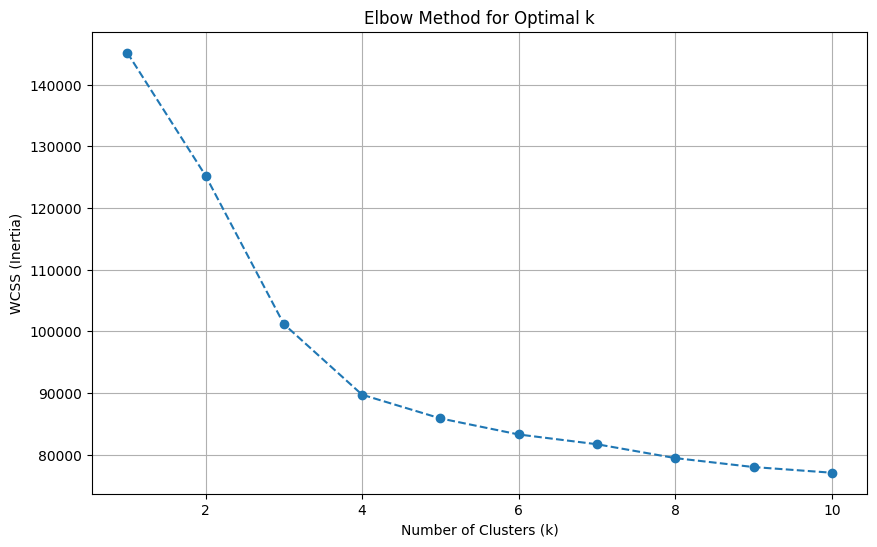

In [417]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11): # Test k from 1 to 10
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

### optimal K at 5

In [418]:
k=5
kmeans =KMeans(n_clusters=k,random_state=42)
y_pred=kmeans.fit_predict(df)
df=pd.DataFrame(df)


In [419]:
from sklearn.metrics import silhouette_score
silhouette_score(df,y_pred)

np.float64(0.17103818798184178)

In [420]:
df.shape

(1000, 175)

## Doing DBSCAN

In [424]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)
labels = dbscan.fit_predict(df)

In [425]:
silhouette_score(df,labels)

np.float64(-0.10154480857943736)

### doing grid search

In [430]:
eps_values = np.arange(0.2, 2.0, 0.2)
min_samples_values = [2, 3, 4, 5]

best_score = -1
best_params = None

# 3. Grid search loop
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(df)

        # Ignore if all points become noise or one big cluster
        if len(set(labels)) > 1 and -1 in labels:
            try:
                score = silhouette_score(df, labels)
                print(f"eps={eps}, min_samples={min_samples}, silhouette={score:.3f}")

                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
            except:
                pass  # skip invalid silhouette cases

print("\nBest Params:", best_params)
print("Best Silhouette Score:", best_score)

eps=0.8, min_samples=2, silhouette=-0.102
eps=1.0, min_samples=2, silhouette=-0.102
eps=1.2, min_samples=2, silhouette=-0.102
eps=1.4000000000000001, min_samples=2, silhouette=-0.102
eps=1.6, min_samples=2, silhouette=-0.102
eps=1.8, min_samples=2, silhouette=-0.102

Best Params: (np.float64(0.8), 2)
Best Silhouette Score: -0.10154480857943736


### As we see, very low score

# Now, we get into PCA

In [434]:
from sklearn.decomposition import PCA
pca =PCA(n_components=2)
df_pca= pca.fit_transform(df)
df_pca.shape

(1000, 2)

In [435]:
k=5
kmeans =KMeans(n_clusters=k,random_state=42)
y_pred=kmeans.fit_predict(df_pca)
df_pca=pd.DataFrame(df_pca)
silhouette_score(df_pca,y_pred)

np.float64(0.5100220495185076)

### As we see the score got to above 50% alhamdullah

## DBSCAN

In [436]:
dbscan = DBSCAN(eps=3, min_samples=2)
labels = dbscan.fit_predict(df_pca)
silhouette_score(df_pca,labels)

np.float64(0.585307414336382)

### And here with DBSCAN, it got even better to 58.5%